# Miller-Tans SVB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import date, timedelta
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import PIL
import datetime
import seaborn as sns
from scipy import stats
from pylr2 import regress2
import random
from statistics import mode

## Functions

In [2]:
# # Conversion Fm (Fraction Modern) to $\Delta$^14^C
def fm_D14C(fm,yr,lft=8267):
    dcy=fm*np.exp((1950-yr)/lft)
    D14C=(dcy-1)*1000
    return D14C

#Conversion $\Delta$^14^C to Fm (Fraction Modern)
def D14C_fm(D14C,yr,lft=8267):
    fm=(D14C/1000+1)*np.exp((yr-1950)/lft)
    return fm
# index o nearest date
def nearest_ind(items, pivot):
    time_diff = np.abs([date - pivot for date in items])
    return time_diff.argmin()+1

## Read data

In [148]:
# Data from field work 
fw=pd.read_excel('~/Documents/MSCA/DISEQ/Lab_work/Results/Air_CO2_Results.xls')
fw['sampling time']=pd.to_datetime(fw['sampling time'])
#fw['time']=pd.to_datetime(fw['sampling time'].astype(str) + " " + fw['sampling time'].astype(str))
H=fw['height'].unique()
dtime=np.zeros(len(fw)); day=np.zeros(len(fw))
for i in range(len(fw)):
    dtime[i]=fw['sampling time'][i].hour+fw['sampling time'][i].minute/60
    day[i]=fw['sampling time'][i].day
fw["dtime"]=dtime; fw["day"]=day


### Time series of $\delta^{13}$C 

/tmp/ipykernel_9390/4109495727.py:4: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=fw,x="sampling time",y="CO2",hue="height", marker="o",palette=palette,ax=ax[0,0])
/tmp/ipykernel_9390/4109495727.py:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=fw,x="sampling time",y="d13C",hue="height", marker="o",palette=palette,ax=ax[0,1])
/tmp/ipykernel_9390/4109495727.py:13: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=fw,x="sampling time",y="CO2",hue="Experiment",marker="o",palette=palette,ax=ax[1,0])
/tmp/ipykernel_9390/4109495727.py:17: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data=fw,x="sampling time",y="d13C",hue="Experiment",marker="o",palette=palette,ax=ax[1,1])
/tmp/ipykernel_9390/4109495727.py:22: UserWarning: The pal

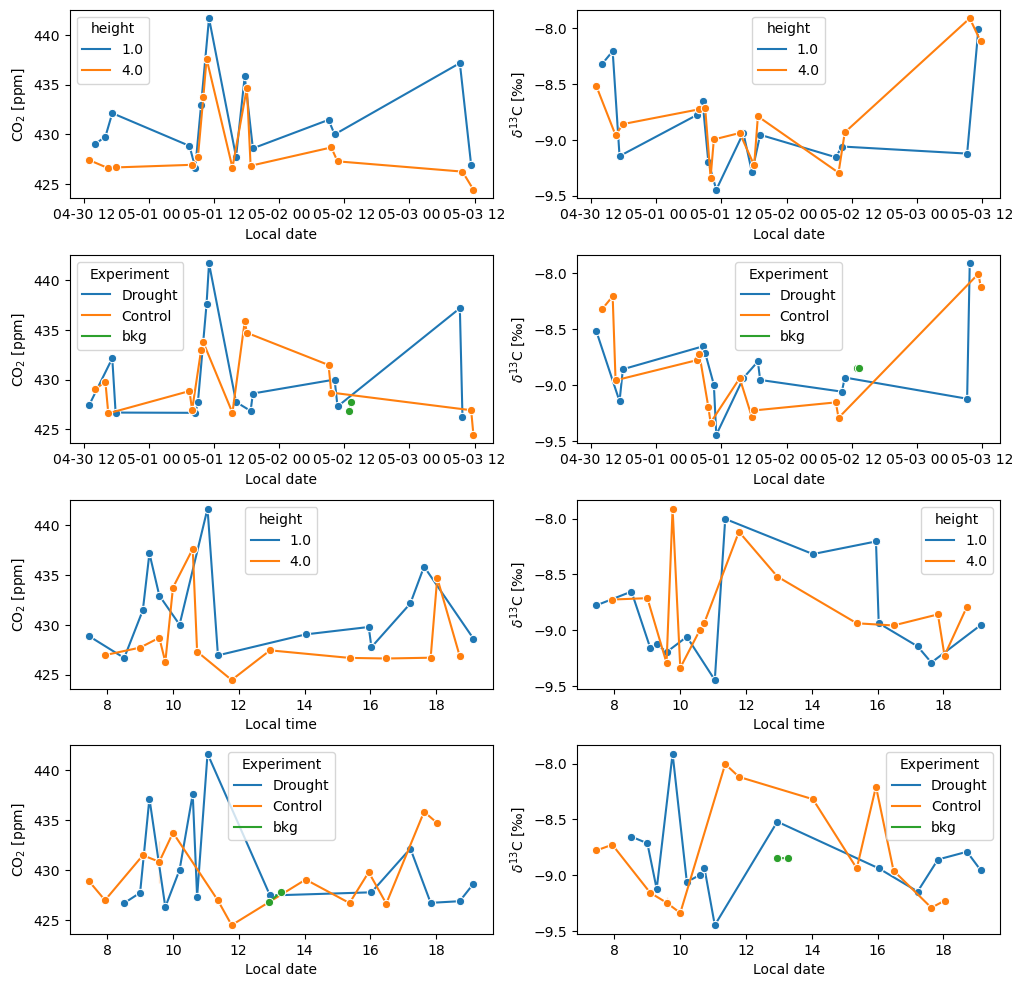

In [186]:
fig,ax=plt.subplots(4,2,figsize=(12,12))
palette=sns.color_palette("tab10",5)

sns.lineplot(data=fw,x="sampling time",y="CO2",hue="height", marker="o",palette=palette,ax=ax[0,0])
ax[0,0].set_xlabel('Local date')
ax[0,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=fw,x="sampling time",y="d13C",hue="height", marker="o",palette=palette,ax=ax[0,1])
ax[0,1].set_xlabel('Local date')
ax[0,1].set_ylabel(r'$\delta^{13}$C [‰]')


sns.lineplot(data=fw,x="sampling time",y="CO2",hue="Experiment",marker="o",palette=palette,ax=ax[1,0])
ax[1,0].set_xlabel('Local date')
ax[1,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=fw,x="sampling time",y="d13C",hue="Experiment",marker="o",palette=palette,ax=ax[1,1])
ax[1,1].set_xlabel('Local date')
ax[1,1].set_ylabel(r'$\delta^{13}$C [‰]')


sns.lineplot(data=fw,x="dtime",y="CO2",hue="height",marker="o",palette=palette,ax=ax[2,0],sort=True)
ax[2,0].set_xlabel('Local time')
ax[2,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=fw,x="dtime",y="d13C",hue="height",marker="o",palette=palette,ax=ax[2,1],sort=True)
ax[2,1].set_xlabel('Local time')
ax[2,1].set_ylabel(r'$\delta^{13}$C [‰]')


sns.lineplot(data=fw,x="dtime",y="CO2",hue="Experiment",marker="o",palette=palette,ax=ax[3,0],sort=True)
ax[3,0].set_xlabel('Local date')
ax[3,0].set_ylabel(r'CO$_{2}$ [ppm]')

sns.lineplot(data=fw,x="dtime",y="d13C",hue="Experiment",marker="o",palette=palette,ax=ax[3,1],sort=True)
ax[3,1].set_xlabel('Local date')
ax[3,1].set_ylabel(r'$\delta^{13}$C [‰]')

plt.subplots_adjust(wspace=0.2,hspace=0.3)

fig.savefig('timeseriesd13C_Prades.pdf')

### Keeling plots of $\delta^{13}$C 

In [120]:
exp=['Drought','Control']



(14, 18)

/tmp/ipykernel_9390/1787131785.py:14: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=fw,x=1/fw["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
/tmp/ipykernel_9390/1787131785.py:27: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=fw,x=1/fw["CO2"]*1000,y="d13C",hue="day",palette=palette,s=80,
/tmp/ipykernel_9390/1787131785.py:51: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
/tmp/ipykernel_9390/1787131785.py:51: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
/tmp/ipykernel_9390/1787131785.py:71: UserWarning: The palette list has more values (5) than needed (4), which may 

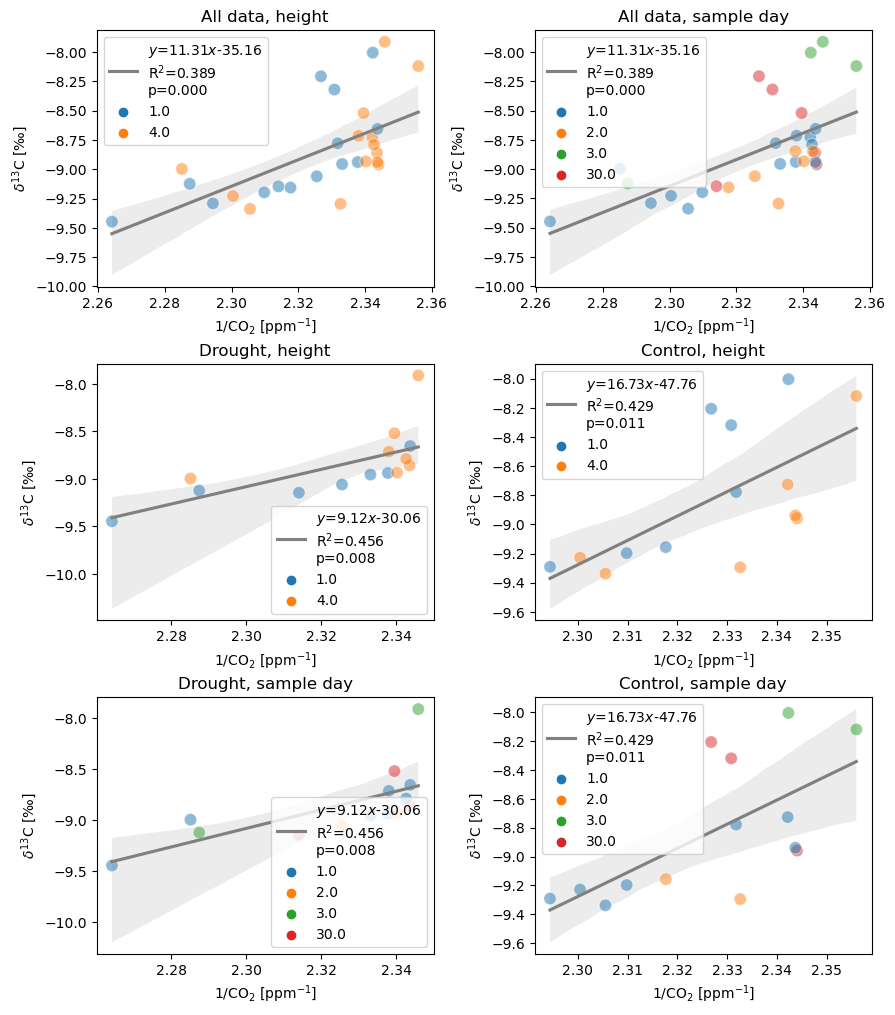

In [187]:
# Keeling plots
fig,axs=plt.subplots(3,2,figsize=(10,12))
fw["CO2-1"]=1/fw["CO2"]*1000

# all data together
slope,intercept,r_value,pv,se=stats.linregress(1/fw["CO2"]*1000,fw["d13C"])
results=regress2(1/fw["CO2"],fw["d13C"])
slope,intercept,r_value,pv,se

sns.regplot(data=fw,x=1/fw["CO2"]*1000,y="d13C",ax=axs[0,0],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=fw,x=1/fw["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[0,0])
handles,labels=axs[0,1].get_legend_handles_labels()
axs[0,0].legend(handles=handles[0:], labels=labels[0:])
axs[0,0].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
axs[0,0].set_ylabel(r'$\delta^{13}$C [‰]')
axs[0,0].set_title('All data, height')


sns.regplot(data=fw,x=1/fw["CO2"]*1000,y="d13C",ax=axs[0,1],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(data=fw,x=1/fw["CO2"]*1000,y="d13C",hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[0,1])
handles,labels=axs[0,1].get_legend_handles_labels()
axs[0,1].legend(handles=handles[0:], labels=labels[0:])
axs[0,1].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
axs[0,1].set_ylabel(r'$\delta^{13}$C [‰]')
axs[0,1].set_title('All data, sample day')


# split by experiments
exp=['Drought','Control']

for i in range(2): #drought and control.
    #fw2=fw[fw['Experiment']==exp[i]]
    fw2=fw[fw['Experiment']==exp[i]]
        
    slope,intercept,r_value,pv,se=stats.linregress(1/fw2["CO2"]*1000,fw2["d13C"])
    results=regress2(1/fw2["CO2"],fw2["d13C"])
    slope,intercept,r_value,pv,se
    
    sns.regplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",ax=axs[1,i],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="height",palette=palette,s=80,
                alpha=0.5,ax=axs[1,i])
    handles,labels=axs[1,i].get_legend_handles_labels()
    axs[1,i].legend(handles=handles[0:], labels=labels[0:])
    axs[1,i].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
    axs[1,i].set_ylabel(r'$\delta^{13}$C [‰]')
    axs[1,i].set_title(exp[i]+', height')

for i in range(2): #drought and control.
    #fw2=fw[fw['Experiment']==exp[i]]
    fw2=fw[fw['Experiment']==exp[i]]
        
    slope,intercept,r_value,pv,se=stats.linregress(1/fw2["CO2"]*1000,fw2["d13C"])
    results=regress2(1/fw2["CO2"],fw2["d13C"])
    slope,intercept,r_value,pv,se
    
    sns.regplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",ax=axs[2,i],scatter=False,color='gray',
            label="$y$={0:.2f}$x${1:.2f}".format(slope,intercept)+
            "\nR$^2$={0:.3f}".format(r_value**2)+
            "\np={0:.3f}".format(pv)).legend(loc="best")
    sns.scatterplot(data=fw2,x=1/fw2["CO2"]*1000,y="d13C",hue="day",palette=palette,s=80,
                alpha=0.5,ax=axs[2,i])
    handles,labels=axs[2,i].get_legend_handles_labels()
    axs[2,i].legend(handles=handles[0:], labels=labels[0:])
    axs[2,i].set_xlabel(r'1/CO$_2$ [ppm$^{-1}$]')
    axs[2,i].set_ylabel(r'$\delta^{13}$C [‰]')
    axs[2,i].set_title(exp[i]+', sample day')

    
plt.subplots_adjust(wspace=0.3,hspace=0.3)
fig.savefig('KPd13C_Prades.pdf')

In [150]:
fw2=fw[(fw['Experiment']==exp[0]) & (fw['height']==1)]

In [158]:

fw2.day

1     30.0
2     30.0
3     30.0
6      1.0
7      1.0
10     1.0
11     1.0
14     1.0
16     1.0
17     1.0
20     2.0
21     2.0
28     3.0
29     3.0
Name: day, dtype: float64

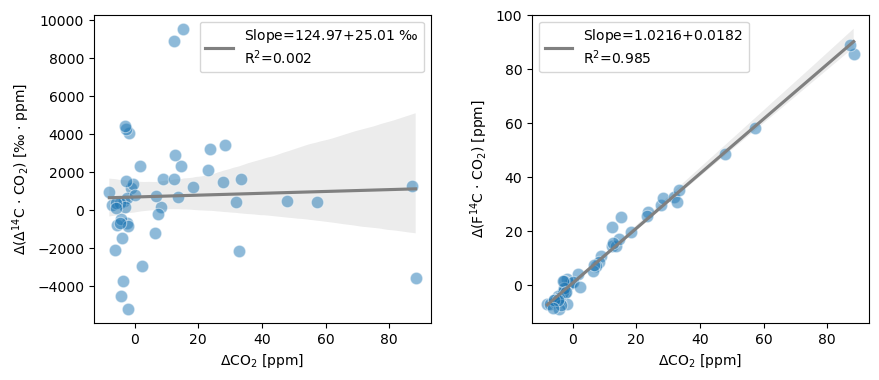

In [6]:
# Miller-Tans plot (Model II)
# reduced major axis, major axis

fig,axs=plt.subplots(1,2,figsize=(10,4))

# F14C (Radiocarbon signature in fraction modern notation (F14)
F14C=D14C_fm(fw['D14CO2'],yr=2023) # it calls the function defined above. 
fw['F14C']=F14C

fw_bkg=fw[fw["height_magl"]>100] # Background (only with 150magl).
fw_can=fw[(fw["height_magl"]<100)]# & (fw["height_magl"]<30)] # subcanopy but above or equal to 10magl (mid-upper canopy)
#fw_can=fw[(fw["height_magl"]<4)] # all
mask=~np.isnan(fw["co2_ppm"]) & ~np.isnan(fw["F14C"])
# with D14C
MT_x=fw_can.co2_ppm-fw_bkg.co2_ppm.mean()
MT_y=(fw_can.D14CO2*fw_can.co2_ppm)-(fw_bkg.D14CO2*fw_bkg.co2_ppm).mean()

rr=regress2(MT_x[mask],MT_y[mask])
slope,r_value,std_slope=rr['slope'],rr['r'],rr['std_slope']
#slope,intercept,r_value,pv,se=stats.linregress(MT_x,MT_y)
sns.regplot(x=MT_x,y=MT_y,scatter=False,color='gray', ax=axs[0],
            label="Slope={0:.2f}$+${1:.2f}".format(slope,std_slope)+
            " ‰\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
            #"\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(x=MT_x,y=MT_y,s=80,ax=axs[0],alpha=0.5)

axs[0].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[0].set_ylabel(r'$\Delta(\Delta^{14}$C $\cdot$ CO$_2$) [‰ $\cdot$ ppm]')

# with F14C
MT_x=fw_can.co2_ppm-fw_bkg.co2_ppm.mean()
MT_y=(fw_can.F14C*fw_can.co2_ppm)-(fw_bkg.F14C*fw_bkg.co2_ppm).mean()


rr=regress2(MT_x[mask],MT_y[mask])
slope,r_value,std_slope=rr['slope'],rr['r'],rr['std_slope']
sns.regplot(x=MT_x,y=MT_y,scatter=False,color='gray', ax=axs[1],
            label="Slope={0:.4f}$+${1:.4f}".format(slope,std_slope)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
           # +"\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(x=MT_x,y=MT_y,s=80,ax=axs[1],alpha=0.5)

axs[1].set_xlabel(r'$\Delta$CO$_2$ [ppm]')
axs[1].set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) [ppm]')
plt.subplots_adjust(wspace=0.3)

## Variation of heights (bootstrapping)

In [7]:
nr=50000 # number of runs. 
npm=10 # minimum number of points for the regression.

In [8]:
slopes_H=np.zeros([nr,3+7])*np.nan# slopes, standard deviation of slopes and R, R2, heigths used for the regression.

#fig,axs=plt.subplots(1,2,figsize=(10,4))
for i in range(nr):
    nn=random.randint(1,len(H)-1) # number of heights to consider in the regression.
    Hs=H[random.sample(range(0,len(H)-1),nn)]
    fw_H=fw[(fw["height_magl"].isin(Hs))]
    mask=~np.isnan(fw_H.F14C) & ~np.isnan(fw_H.co2_ppm)
    MT_x=fw_H.co2_ppm-fw_bkg.co2_ppm.mean()
    MT_y=(fw_H.F14C*fw_H.co2_ppm)-(fw_bkg.F14C*fw_bkg.co2_ppm).mean()

    if (len(MT_x[mask])>=npm):
        rr=regress2(MT_x[mask],MT_y[mask])
        slopes_H[i,0:3]=rr['slope'],rr['std_slope'],rr['r']
        slopes_H[i,3:3+Hs.size]=Hs

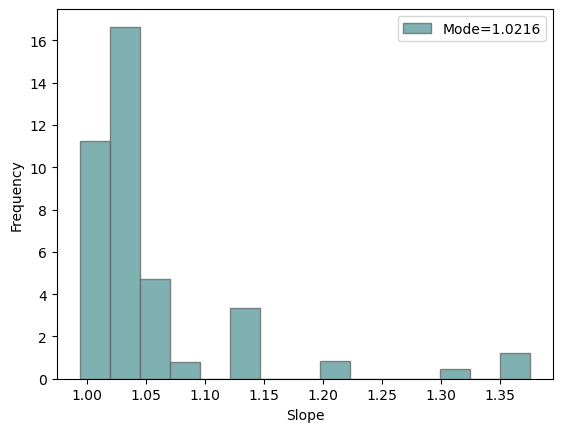

In [9]:
plt.hist(slopes_H[:,0],15,facecolor='cadetblue',alpha=0.8,edgecolor='dimgray',density=True,label="Mode={0:.4f}".format(mode(slopes_H[:,0])))

plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.legend()


/tmp/ipykernel_11643/2548300085.py:3: RuntimeWarning: Mean of empty slice
  H_mean[i]=np.nanmean(slopes_H[i,3:])


Text(0, 0.5, 'Frequency')

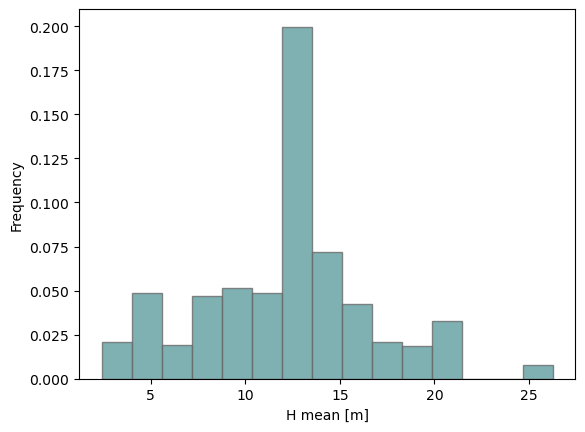

In [10]:
H_mean=np.zeros(nr)
for i in range(nr):
    H_mean[i]=np.nanmean(slopes_H[i,3:])

plt.hist(H_mean,15,facecolor='cadetblue',alpha=0.8,edgecolor='dimgray',density=True)

plt.xlabel('H mean [m]')
plt.ylabel('Frequency')
#plt.legend()


## Figures paper

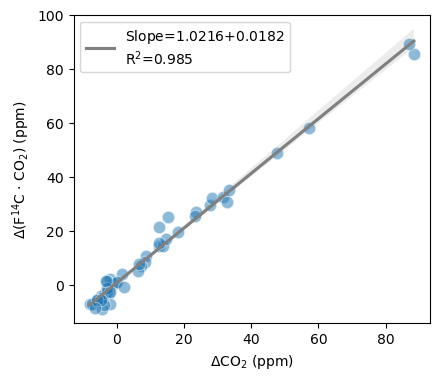

In [48]:
fig,axs=plt.subplots(1,figsize=(4.6,4))

sns.regplot(x=MT_x,y=MT_y,scatter=False,color='gray', ax=axs,
            label="Slope={0:.4f}$+${1:.4f}".format(slope,std_slope)+
            "\nR$^2$={0:.3f}".format(r_value**2)).legend(loc="best")
           # +"\np={0:.3f}".format(pv)).legend(loc="best")
sns.scatterplot(x=MT_x,y=MT_y,s=80,ax=axs,alpha=0.5)

axs.set_xlabel(r'$\Delta$CO$_2$ (ppm)')
axs.set_ylabel(r'$\Delta$(F$^{14}$C $\cdot$ CO$_2$) (ppm)')



fig.savefig('Example_Miller-Tans_SVB.pdf',bbox_inches='tight')


#plt.subplots_adjust(wspace=0.3)

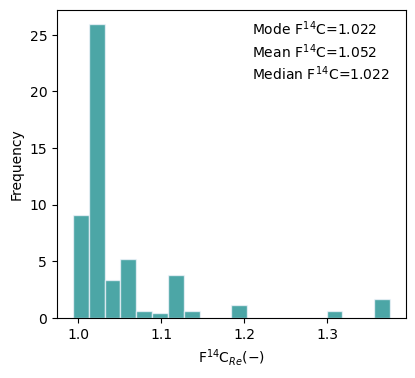

In [77]:
fig,axs=plt.subplots(1,figsize=(4.5,4))

axs.hist(slopes_H[:,0],20,facecolor='teal',alpha=0.7,edgecolor='ghostwhite',
         density=True,label="Mode slope={0:.4f}".format(mode(slopes_H[:,0]))+r' ‰ \n Mean')


axs.text(1.21,25,"Mode F$^1$$^4$C={0:.3f}".format(mode(slopes_H[:,0])))
axs.text(1.21,23,"Mean F$^1$$^4$C={0:.3f}".format(np.nanmean(slopes_H[:,0])))
axs.text(1.21,21,"Median F$^1$$^4$C={0:.3f}".format(np.nanmedian(slopes_H[:,0])))


axs.set_xlabel(r'F$^{14}$C$_{Re} (-)$')
axs.set_ylabel('Frequency')

fig.savefig('Histogram_Miller-Tans_SVB_F14C.pdf',bbox_inches='tight')
#axs.legend()


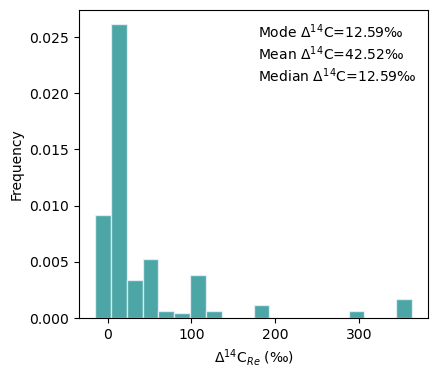

In [81]:
slopes_H_d14=fm_D14C(slopes_H[:,0],yr=2023) # it calls the function defined above. 


fig,axs=plt.subplots(1,figsize=(4.5,4))

axs.hist(slopes_H_d14,20,facecolor='teal',alpha=0.7,edgecolor='ghostwhite',
         density=True,label="Mode slope={0:.4f}".format(mode(slopes_H_d14))+r' ‰ \n Mean')

#axs.text(1.24,25, "  Mode={0:.3f}".format(mode(slopes_H[:,0])))
axs.text(180,0.025,"Mode $\Delta^1$$^4$C={0:.2f}".format(mode(slopes_H_d14))+r'‰')
axs.text(180,0.023,"Mean $\Delta^1$$^4$C={0:.2f}".format(np.nanmean(slopes_H_d14))+r'‰')
axs.text(180,0.021,"Median $\Delta^1$$^4$C={0:.2f}".format(np.nanmedian(slopes_H_d14))+r'‰')



axs.set_xlabel('$\Delta^{14}$C$_{Re}$ (‰)')
axs.set_ylabel('Frequency')

fig.savefig('Histogram_Miller-Tans_SVB_D14C.pdf',bbox_inches='tight')
# axs.legend()

## Save figures and data

In [20]:
df=pd.DataFrame(slopes_H,columns=['Slope','std_slope','R'])

df.to_csv("slope_Hv2.csv")

In [52]:
fig.savefig('Miller-Tans_SVB.pdf')